In [268]:
import pandas as pd
import numpy as np
import math
from urllib.request import urlretrieve
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [269]:
medical_expense = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_expense, 'medical.csv')
medical_df = pd.read_csv('medical.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [270]:
def estimate_charges(age, w, b):
  return w * age + b
estimated_charges = estimate_charges(medical_df.age, 267.24891283, -2091.4205565650864)
estimated_charges.head()

,age
0,2986.308787
1,2719.059874
2,5391.549003
3,6727.793567
4,6460.544654


In [271]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [272]:
#residual = predicted - actual
predicted_value = estimated_charges
target_charges = non_smoker_df.charges
residual = predicted_value - target_charges
residual.head()

,0
0,NaN
1,993.507574
2,942.087003
3,-15256.677043
4,2593.689454


In [273]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))
targets = non_smoker_df.charges
rmse(targets, estimated_charges)

np.float64(4662.505766636395)

In [274]:
ages = non_smoker_df.age
charges = non_smoker_df.charges
def try_parameter(w, b):
  estimated_charges = estimate_charges(ages, w, b)
  targets = non_smoker_df.charges
  fig_charges = plt.figure(figsize=(8,6))
  axes_charges = fig_charges.add_axes([0,0,1,1])
  axes_charges.scatter(ages, charges, color='orange')
  axes_charges.plot(ages, estimated_charges, color='red')
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.title('Age vs Charges')
  return rmse(targets, estimated_charges)

np.float64(4662.505766636395)

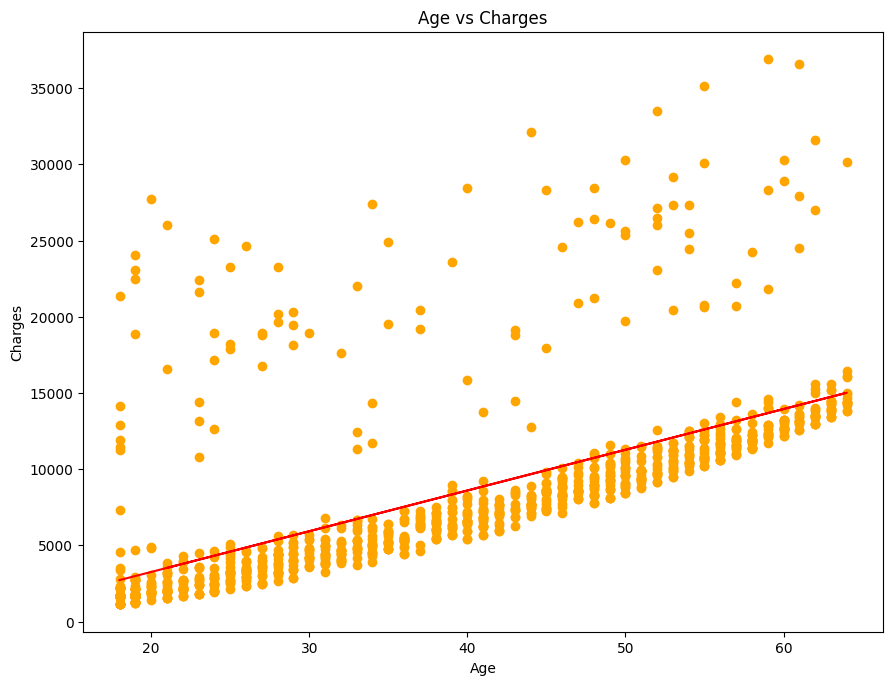

In [275]:
try_parameter(267.24891283, -2091.4205565650864)

In [276]:
model = LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [277]:
#Ordinary Least Square(Small Dataset)
#Stochastic Gradient Descent(Larger Dataset)
input = non_smoker_df[['age']]
target = non_smoker_df.charges
print('Input shape:', input.shape)
print('Target shape:', target.shape)

Input shape: (1064, 1)
Target shape: (1064,)


In [278]:
model.fit(input, target)

LinearRegression()

In [279]:
predictions = model.predict(input)
predictions, target

(array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
        2719.0598744 , 3520.80661289]),
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
 5        3756.62160
            ...     
 1332    11411.68500
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 Name: charges, Length: 1064, dtype: float64)

In [280]:
rmse(target, predictions)

np.float64(4662.505766636395)

In [281]:
print('Predicted w: ', model.coef_)
print('Predicted b: ', model.intercept_)

Predicted w:  [267.24891283]
Predicted b:  -2091.4205565650864


In [282]:
model_sgd = SGDRegressor()
model_sgd.fit(input, target)

SGDRegressor()

In [283]:
model_sgd.predict(input)
model_sgd.coef_, model_sgd.intercept_

(array([589.6409631]), array([-5297.51337146]))

np.float64(11507.468009128392)

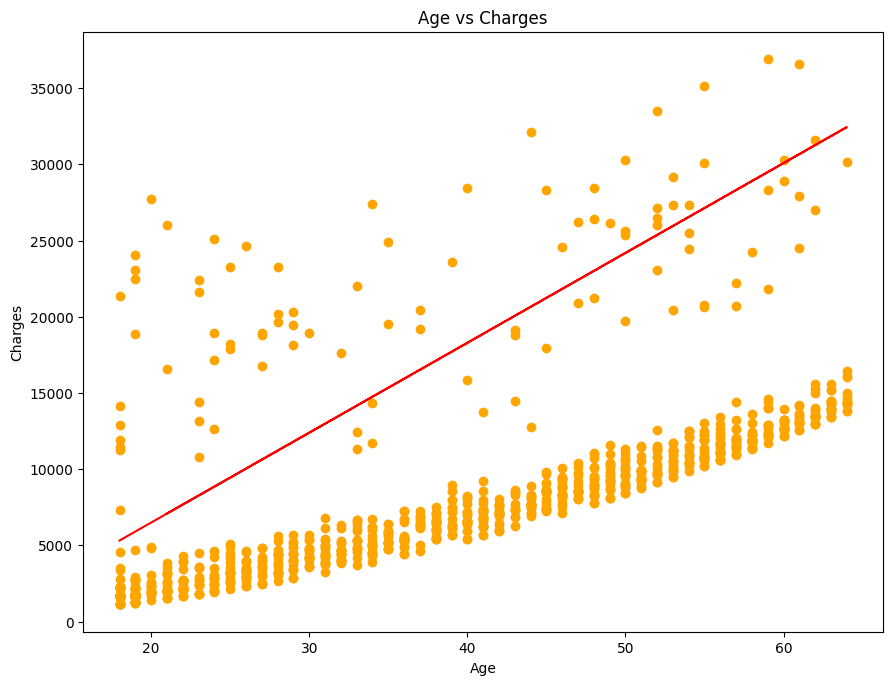

In [284]:
try_parameter(model_sgd.coef_, model_sgd.intercept_)

In [285]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ',loss)
print('Predicted w1, w2, w3: ',model.coef_)
print('Predicted b: ',model.intercept_)

Loss:  4608.470405038247
Predicted w1, w2, w3:  [265.2938443    5.27956313 580.65965053]
Predicted b:  -2809.2976032235892


<Axes: xlabel='smoker', ylabel='charges'>

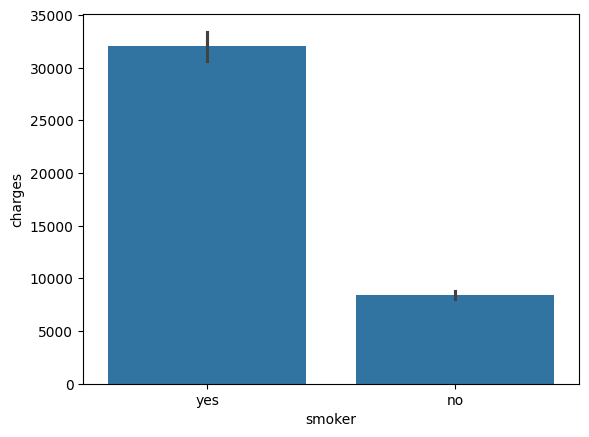

In [286]:
'''
Categorical Data
#1 Two Categories: 0 and 1
#2 More Tnan Two Category: One-Hot Encoding
#3 Natural Order: Ordinal Encoding
'''
sns.barplot(x='smoker', y='charges', data=medical_df)

<Axes: >

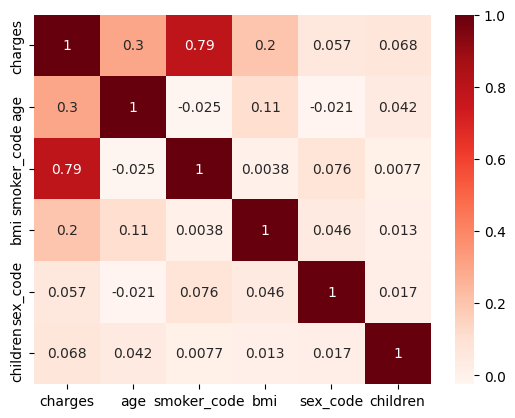

In [287]:
#Smoker Code
smoker_code = {'yes': 1, 'no': 0}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)
#Sex Code
sex_code = {'male': 1, 'female': 0}
medical_df['sex_code'] = medical_df.sex.map(sex_code)
#Heatmap
sns.heatmap(medical_df[['charges','age','smoker_code','bmi', 'sex_code','children']].corr(), cmap='Reds', annot=True)

In [288]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_
#One-Hot Encoding
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [289]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code',
                              'northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']
model_final = LinearRegression().fit(inputs, targets)
predictions = model_final.predict(inputs)
loss = rmse(targets, predictions)
print('Loss: ', loss)
print('Predicted w: ', model.coef_)
print('Predicted b: ', model.intercept_)
new_customer = [[19, 27.9, 0, 1, 0, 1, 0, 0, 0]]
print('Charges will be: ', model_final.predict(new_customer))

Loss:  6041.6796511744515
Predicted w:  [265.2938443    5.27956313 580.65965053]
Predicted b:  -2809.2976032235892
Charges will be:  [26253.7640197]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [290]:
weight_df = pd.DataFrame({
    'Variable': ['age', 'bmi', 'children', 'smoker_code', 'sex_code',
                              'northeast', 'northwest', 'southeast', 'southwest'],
    'Weight': model_final.coef_
})
weight_df

,Variable,Weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756


In [291]:
'''Optimization and Standardization'''
from sklearn.preprocessing import StandardScaler
numeric_columns = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_columns])

StandardScaler()

In [292]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [293]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [294]:
scaled_inputs = scaler.transform(medical_df[numeric_columns])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [295]:
cat_col = ['smoker_code','sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_col].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [296]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
target = medical_df.charges
model = LinearRegression().fit(inputs, target) #Training the Model
predictions = model.predict(inputs) #Generating Prediction
loss = rmse(target, predictions) #Computing Loss
print('Loss: ', loss)
print('Predicted w: ', model.coef_)
print('Predicted b: ', model.intercept_)

Loss:  6041.6796511744515
Predicted w:  [ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
Predicted b:  8466.48321541183


In [297]:
import numpy as np
weight_df = pd.DataFrame({
    'Variable': np.append(numeric_columns + cat_col, 1),
    'Weight': np.append(model.coef_, model.intercept_)
})
weight_df.sort_values('Weight', ascending=False)

,Variable,Weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [298]:
new_customer = [[19, 27.9, 0, 1, 0, 1, 0, 0, 0]]
scaler.transform([[19, 27.9, 0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.43876426, -0.45332   , -0.90861367]])

In [299]:
new_customer_scaled = [[-1.43876426, -0.45332, -0.90861367, 1, 0, 1, 0, 0, 0]]
model.predict(new_customer_scaled)

array([26253.76402219])